In [1]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src import config, data_utils, preprocessing

In [6]:
from sas7bdat import SAS7BDAT

In [9]:
with SAS7BDAT('dataset/H_MHAS_c.sas7bdat', skip_header=True) as reader:
    df = reader.to_data_frame()

[H_MHAS_c.sas7bdat] column count mismatch
[H_MHAS_c.sas7bdat] column count mismatch


In [10]:
print(df)

       1.0  1.0  1.0  1.0  10.0      110.0      110  12.0  12.0  1.0  ...  \
0      2.0  2.0  2.0  2.0  20.0      120.0      120  11.0  11.0  1.0  ...   
1      1.0  1.0  1.0  1.0  10.0      210.0      210  11.0  22.0  1.0  ...   
2      2.0  2.0  2.0  2.0  20.0      220.0      220  12.0  11.0  3.0  ...   
3      1.0  1.0  1.0  1.0  10.0      310.0      310  11.0  11.0  1.0  ...   
4      NaN  3.0  NaN  3.0  11.0      311.0      311   NaN  12.0  1.0  ...   
...    ...  ...  ...  ...   ...        ...      ...   ...   ...  ...  ...   
26833  NaN  NaN  NaN  NaN  10.0  2021610.0  2021610   NaN   NaN  NaN  ...   
26834  NaN  NaN  NaN  NaN  20.0  2021620.0  2021620   NaN   NaN  NaN  ...   
26835  NaN  NaN  NaN  NaN  10.0  2021710.0  2021710   NaN   NaN  NaN  ...   
26836  NaN  NaN  NaN  NaN  10.0  2021810.0  2021810   NaN   NaN  NaN  ...   
26837  NaN  NaN  NaN  NaN  20.0  2021820.0  2021820   NaN   NaN  NaN  ...   

      None None  1.5107311010360718      None      None  1.5107311010360718

1.1. Load the training and test datasets.

In [3]:
app_train, app_test, columns_description = data_utils.get_datasets()


if app_train.shape == (246008, 122):
    print("Success: app_train shape is correct!")
else:
    raise ValueError("Train dataset shape is incorrect, please review your code")

if isinstance(app_train, pd.DataFrame):
    print("Success: app_train type is correct!")
else:
    raise ValueError("Train dataset type is incorrect, please review your code")

if app_test.shape == (61503, 122):
    print("Success: app_test shape is correct!")
else:
    raise ValueError("Test dataset shape is incorrect, please review your code")

if isinstance(app_test, pd.DataFrame):
    print("Success: app_test type is correct!")
else:
    raise ValueError("Test dataset type is incorrect, please review your code")

Success: app_train shape is correct!
Success: app_train type is correct!
Success: app_test shape is correct!
Success: app_test type is correct!


### Exploratory Data Analysis

#### Dataset Basics

In [4]:
### shape of the dataset
print(app_train.shape)
print(app_test.shape)

(246008, 122)
(61503, 122)


1.3. List all columns in the train dataset.

In [5]:
### TODO Complete in this cell: Show all columns in the training dataset
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,428247,0,Cash loans,F,N,N,0,157500.0,634500.0,30523.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,140966,0,Cash loans,M,Y,Y,1,90000.0,1223010.0,51948.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,407283,0,Revolving loans,F,N,Y,0,405000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,434300,0,Cash loans,F,N,N,0,90000.0,439740.0,18630.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
4,446788,0,Cash loans,F,N,N,0,67500.0,323388.0,18054.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,279971,0,Cash loans,F,N,N,0,90000.0,284400.0,16456.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
246004,279381,0,Cash loans,F,N,N,0,67500.0,1080000.0,31576.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
246005,397830,0,Cash loans,F,N,N,0,157500.0,509400.0,28444.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
246006,213394,0,Cash loans,F,N,Y,0,225000.0,83538.0,6376.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
### TODO Complete in this cell: show first 5 records in a transposed table
df = app_train.head()

df.transpose()

,0,1,2,3,4
SK_ID_CURR,428247,140966,407283,434300,446788
TARGET,0,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,F,M,F,F,F
FLAG_OWN_CAR,N,Y,N,N,N
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,NaN,0.0,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,NaN,0.0,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_MON,NaN,0.0,0.0,0.0,0.0
AMT_REQ_CREDIT_BUREAU_QRT,NaN,0.0,0.0,1.0,0.0


1.5. Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

         Total  Percentage
TARGET                    
0       226257   91.971399
1        19751    8.028601


<AxesSubplot: xlabel='Total', ylabel='Percentage'>

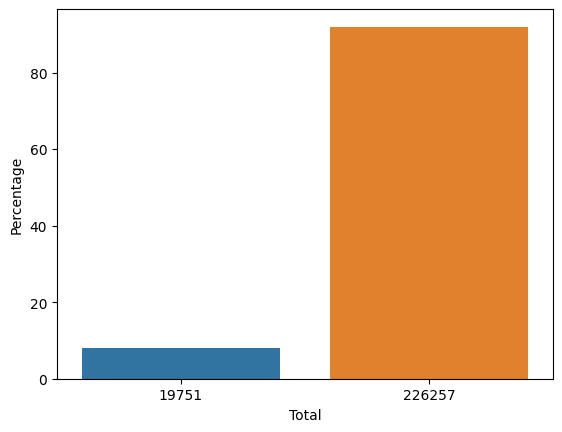

In [7]:
### TODO Complete in this cell: show distribution of target variable

df = app_train.reset_index().groupby(['TARGET']).size().to_frame('Total')

df['Percentage'] = df['Total'].div(df['Total'].sum()).mul(100)

print(df)

sns.barplot(x='Total', y='Percentage', data=df)


1.6. Show the number of columns of each data type.

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
float64    45
int64      32
object     10
```

In [8]:
### TODO Complete in this cell: show number of columns per data type
df = app_train.info()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246008 entries, 0 to 246007
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB
None


1.7. For categorical variables (`object` data type), show the number of distinct values in each column (number of labels).

Just for giving you an idea, the output should look like this (not exactly the same numbers):

```python
NAME_CONTRACT_TYPE             5
CODE_GENDER                    2
FLAG_OWN_CAR                   1
FLAG_OWN_REALTY                1
...
```

In [9]:
### TODO Complete in this cell: show number of unique values per categorical column

df = app_train.select_dtypes(include='object').nunique().to_frame('LABELS').reset_index()

print(df)


                         index  LABELS
0           NAME_CONTRACT_TYPE       2
1                  CODE_GENDER       3
2                 FLAG_OWN_CAR       2
3              FLAG_OWN_REALTY       2
4              NAME_TYPE_SUITE       7
5             NAME_INCOME_TYPE       8
6          NAME_EDUCATION_TYPE       5
7           NAME_FAMILY_STATUS       6
8            NAME_HOUSING_TYPE       6
9              OCCUPATION_TYPE      18
10  WEEKDAY_APPR_PROCESS_START       7
11           ORGANIZATION_TYPE      58
12          FONDKAPREMONT_MODE       4
13              HOUSETYPE_MODE       3
14          WALLSMATERIAL_MODE       7
15         EMERGENCYSTATE_MODE       2


1.8. Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

Just for giving you an idea, the output should look like this (not exactly the same numbers and columns names):

```python
                   Total   Percent
COMMONAREA_AVG    121000      85.2
COMMONAREA_MODE   121000      76.6
COMMONAREA_MEDI   121000      62.9
...
```

In [10]:
### Checking missing data

df = app_train.reset_index().isna().sum().to_frame('Total')

df['Percentage'] = (app_train.isnull().sum()/len(app_train))*100

df2 = df.sort_values(by='Percentage', ascending=False)

print(df2[1:21])


                           Total  Percentage
COMMONAREA_AVG            172189   69.993252
COMMONAREA_MODE           172189   69.993252
NONLIVINGAPARTMENTS_MODE  171096   69.548958
NONLIVINGAPARTMENTS_AVG   171096   69.548958
NONLIVINGAPARTMENTS_MEDI  171096   69.548958
FONDKAPREMONT_MODE        168561   68.518503
LIVINGAPARTMENTS_MODE     168494   68.491269
LIVINGAPARTMENTS_AVG      168494   68.491269
LIVINGAPARTMENTS_MEDI     168494   68.491269
FLOORSMIN_AVG             167255   67.987626
FLOORSMIN_MODE            167255   67.987626
FLOORSMIN_MEDI            167255   67.987626
YEARS_BUILD_MEDI          163980   66.656369
YEARS_BUILD_MODE          163980   66.656369
YEARS_BUILD_AVG           163980   66.656369
OWN_CAR_AGE               162503   66.055982
LANDAREA_MEDI             146436   59.524893
LANDAREA_MODE             146436   59.524893
LANDAREA_AVG              146436   59.524893
BASEMENTAREA_MEDI         144316   58.663133


#### Analyzing distribution of variables

1.10. Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

*Hint:* Take a look at `NAME_EDUCATION_TYPE` column.

                                Total  Percentage
NAME_EDUCATION_TYPE                              
Secondary / secondary special  174657   70.996472
Higher education                59990   24.385386
Incomplete higher                8248    3.352736
Lower secondary                  2984    1.212969
Academic degree                   129    0.052437


<AxesSubplot: xlabel='Total', ylabel='Percentage'>

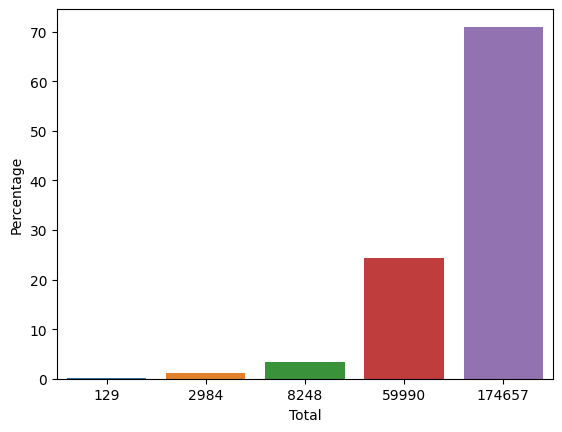

In [12]:
### TODO Complete in this cell: level of education plot

df = app_train.reset_index().groupby(['NAME_EDUCATION_TYPE']).size().to_frame('Total')

df['Percentage'] = (df['Total']/len(app_train))*100

df1 = df.sort_values(by='Percentage', ascending=False)

print(df1)

sns.barplot(x='Total', y='Percentage', data=df)


1.11. Plot the distribution of ocupation of the loan applicants.

*Hint:* Take a look at `OCCUPATION_TYPE` column.

<AxesSubplot: xlabel='TotalLA', ylabel='OCCUPATION_TYPE'>

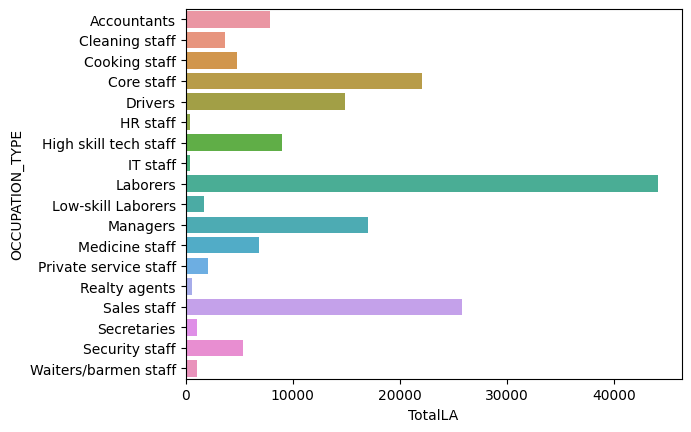

In [13]:
### TODO Complete in this cell: ocupation of applicants

df = app_train.groupby(['OCCUPATION_TYPE']).size().to_frame('TotalLA').reset_index('OCCUPATION_TYPE')

sns.barplot(x='TotalLA', y='OCCUPATION_TYPE', data=df)


1.12. Plot the family status of the applicants.

*Hint:* Take a look at `NAME_FAMILY_STATUS` column.

<function matplotlib.pyplot.show(close=None, block=None)>

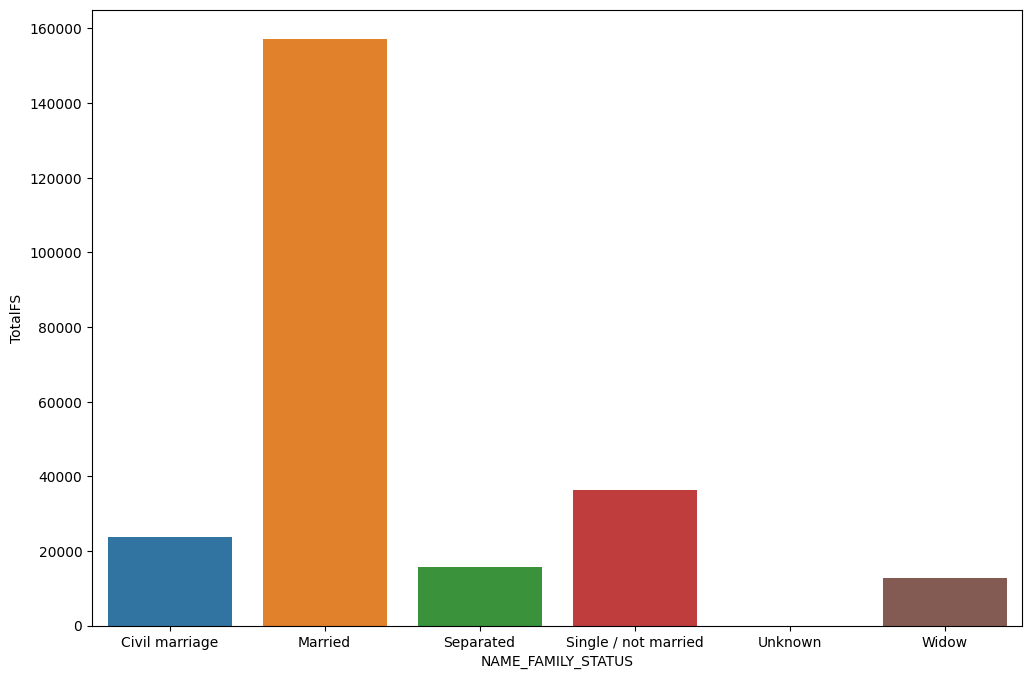

In [14]:
### TODO Complete in this cell: family status

df = app_train.groupby(['NAME_FAMILY_STATUS']).size().to_frame('TotalFS').reset_index('NAME_FAMILY_STATUS')

plt.figure(figsize=(12,8))

ax =sns.barplot(x='NAME_FAMILY_STATUS', y='TotalFS', data=df)

plt.show


1.13. Plot the income type of applicants grouped by the target variable.

*Hint:* Take a look at `NAME_INCOME_TYPE` and `TARGET` columns. You can use `hue` parameter on Seaborn to group samples using another categorical feature.

<function matplotlib.pyplot.show(close=None, block=None)>

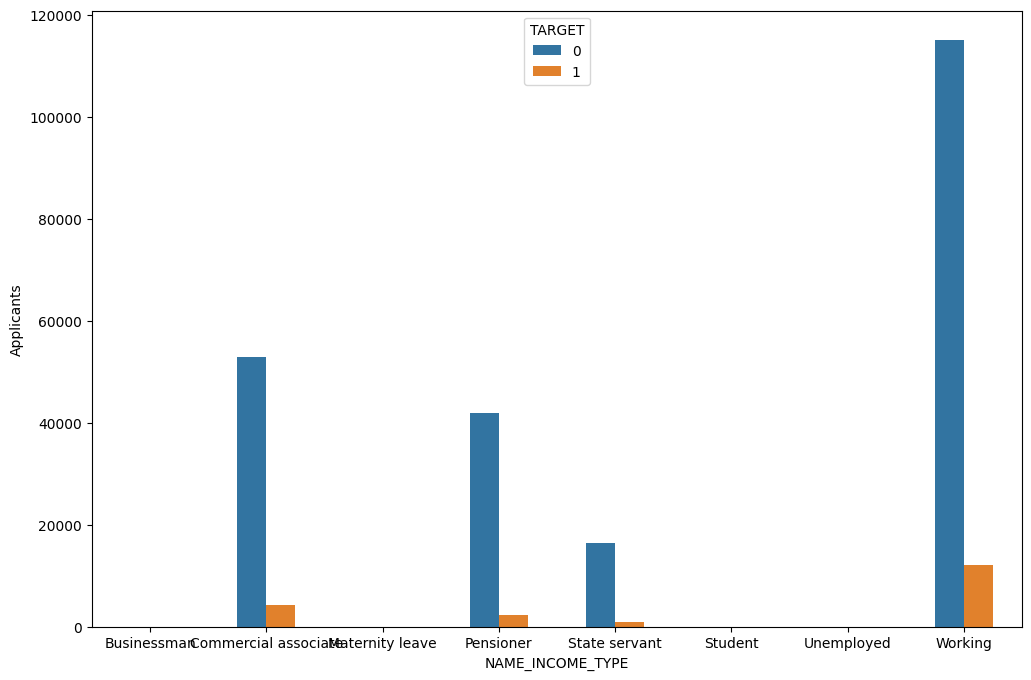

In [15]:
### TODO Complete in this cell: Income type of applicants by target variable

df = app_train.groupby(['TARGET','NAME_INCOME_TYPE']).size().to_frame('Applicants').reset_index()

plt.figure(figsize=(12,8))

ax = sns.barplot(x='NAME_INCOME_TYPE', y='Applicants', hue='TARGET', data=df, width=0.5)

plt.show

## 2. Preprocessing

2.1. The next step will be to separate our train and test datasets columns between Features (the input to the model) and Targets (what the model has to predict with the given features).

- Assign to `X_train` all the columns from `app_train` that should be used as features for training our models.
- Assign to `y_train` the single column from `app_train` that should be used as our target (i.e. what we want to predict).
- Assign to `X_test` all the columns from `app_test` that should be used as features for training our models.
- Assign to `y_test` the single column from `app_test` that should be used as our target (i.e. what we want to predict).

To do that, you will have to complete the function `data_utils.get_feature_target()` in all the parts with a `TODO` mark.


**Don't change anything in this cell, just make it run correctly**

In [16]:
# Now we execute the function above to get the result
X_train, y_train, X_test, y_test = data_utils.get_feature_target(app_train, app_test)

if X_train.shape == (246008, 121):
    print("Success: X_train shape is correct!")
else:
    raise ValueError("X_train dataset shape is incorrect, please review your code")

if isinstance(X_train, pd.DataFrame):
    print("Success: X_train type is correct!")
else:
    raise ValueError("Train dataset type is incorrect, please review your code")

if y_train.shape == (246008,) or y_train.shape == (246008, 1):
    print("Success: y_train shape is correct!")
else:
    raise ValueError("Train labels shape is incorrect, please review your code")

if X_test.shape == (61503, 121):
    print("Success: X_test shape is correct!")
else:
    raise ValueError("Test dataset shape is incorrect, please review your code")

if isinstance(X_test, pd.DataFrame):
    print("Success: X_test type is correct!")
else:
    raise ValueError("Test dataset type is incorrect, please review your code")

if y_test.shape == (61503,) or y_test.shape == (61503, 1):
    print("Success: y_test shape is correct!")
else:
    raise ValueError("Test labels shape is incorrect, please review your code")

Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.2. In order to avoid overfitting while searching for the best model hyperparameters, it's always a good idea to split our training dataset into two new sets called `train` and `validation`. 

While the `train` data will be used to fit the model and adjust its internal weights, the `validation` will be exclusively used to test the model performance on unseen data during training, it's like a testing dataset used during experimentation.

Remember we can't use the `test` dataset to validate the model performance because this one lacks of labels :( So the `validation` data will be the only resource you will have to evaluate the final model performance before doing your submission.

To do that, you will have to complete the function `data_utils.get_train_val_sets()` in all the parts with a `TODO` mark.

This function should perform these activities:
- Use the `sklearn.model_selection.train_test_split` function with `X_train`, `y_train` datasets.
- Assign only 20% of the dataset for testing (see `test_size` parameter in `train_test_split`)
- Assign a seed so we get reproducible output across multiple function calls (see `random_state` parameter in `train_test_split`)
- Shuffle the data (see `shuffle` parameter in `train_test_split`)

For reference, see:
- [Scikit-learn train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Wikipedia: Training, validation, and test data sets](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets)
- [Train Test Validation Split: How To & Best Practices](https://www.v7labs.com/blog/train-validation-test-set)


**Don't change anything in this cell, just make it run correctly**

In [17]:
# Now we execute the function above to get the result
X_train, X_val, y_train, y_val = data_utils.get_train_val_sets(X_train, y_train)

if X_train.shape == (196806, 121):
    print("Success: X_train shape is correct!")
else:
    raise ValueError("X_train dataset shape is incorrect, please review your code")

if isinstance(X_train, pd.DataFrame):
    print("Success: X_train type is correct!")
else:
    raise ValueError("Train dataset type is incorrect, please review your code")

if y_train.shape == (196806,) or y_train.shape == (196806, 1):
    print("Success: y_train shape is correct!")
else:
    raise ValueError("Train labels shape is incorrect, please review your code")

if X_val.shape == (49202, 121):
    print("Success: X_test shape is correct!")
else:
    raise ValueError("Test dataset shape is incorrect, please review your code")

if isinstance(X_val, pd.DataFrame):
    print("Success: X_test type is correct!")
else:
    raise ValueError("Test dataset type is incorrect, please review your code")

if y_val.shape == (49202,) or y_val.shape == (49202, 1):
    print("Success: y_test shape is correct!")
else:
    raise ValueError("Test labels shape is incorrect, please review your code")

Success: X_train shape is correct!
Success: X_train type is correct!
Success: y_train shape is correct!
Success: X_test shape is correct!
Success: X_test type is correct!
Success: y_test shape is correct!


2.3. In this section, you will code a function to make all the data pre-processing for the dataset. What you have to deliver is a function that takes `X_train`, `X_val`, and `X_test` dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities, in this order:

1. Correct outliers/anomalous values in numerical columns (`DAYS_EMPLOYED` column)
2. Encode string categorical features (dytpe `object`):
    - If the feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
3. Impute values for all columns with missing data (use median as imputing value)
4. Feature scaling with Min-Max scaler.

Complete the function `preprocessing.preprocess_data()` following the instructions given above.

In the following cell, we are going to execute the preprocessing function you've just coded. No need to modify this.

**Important Note:** From now on, you must always use `train_data` for training your models and `val_data` only for the final evaluation of the model trained. About `test_data`, it will be used at the end only for submitting your final model predictions and be evaluated on our side with the hidden annotations.


**Don't change anything in this cell, just make it run correctly**

In [18]:
train_data, val_data, test_data = preprocessing.preprocess_data(X_train, X_val, X_test)


if train_data.shape == (196806, 246):
    print("Success: train_data shape is correct!")
else:
    raise ValueError("train_data dataset shape is incorrect, please review your code")

if isinstance(train_data, np.ndarray):
    print("Success: train_data type is correct!")
else:
    raise ValueError("Train dataset type is incorrect, please review your code")

if val_data.shape == (49202, 246):
    print("Success: val_data shape is correct!")
else:
    raise ValueError("val_data dataset shape is incorrect, please review your code")

if isinstance(val_data, np.ndarray):
    print("Success: val_data type is correct!")
else:
    raise ValueError("Validation dataset type is incorrect, please review your code")

if test_data.shape == (61503, 246):
    print("Success: test_data shape is correct!")
else:
    raise ValueError("test_data dataset shape is incorrect, please review your code")

if isinstance(test_data, np.ndarray):
    print("Success: test_data type is correct!")
else:
    raise ValueError("Test dataset type is incorrect, please review your code")

Input train data shape:  (196806, 121)
Input val data shape:  (49202, 121)
Input test data shape:  (61503, 121) 

Success: train_data shape is correct!
Success: train_data type is correct!
Success: val_data shape is correct!
Success: val_data type is correct!
Success: test_data shape is correct!
Success: test_data type is correct!


## 3. Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

**Pro tip:** It is of utmost importance to make an accurate estimation of the time required to train a machine learning model. Because of this, we recommend you to use Python [time](https://docs.python.org/3/library/time.html) library or Jupyter magic function `%%time` on the cell you're training your model to get an estimate of the time it took to fit your data.

### Baseline: LogisticRegression

3.1. Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter.

Assign the trained model to `log_reg` variable.

**Don't change anything in this cell, just make it run correctly**

In [19]:
%%time

# This is an example code on how to:
#   - Create and fit (train) a logistic regression
#   - Assign to `log_reg` variable
log_reg = None
log_reg = LogisticRegression(C=0.0001)
log_reg.fit(train_data, y_train)


CPU times: total: 6.81 s
Wall time: 3.42 s


LogisticRegression(C=0.0001)

**Don't change anything in this cell, just make it run correctly**

In [20]:
if isinstance(log_reg, LogisticRegression):
    print("Success: Logistic regression model type is correct!")
else:
    raise ValueError(
        "Logistic regression model type is incorrect, please review your code"
    )

check_is_fitted(log_reg)

Success: Logistic regression model type is correct!


3.2. Use the trained model to predict probabilities for `train_data` and `val_data`.

**Important note:** When using the function `predict_proba()` for getting model probabilities you will get, for each sample, a tuple indicating the probability for class 0 and for class 1 respectively. For computing the AUC ROC score we only need the probability that the debt is not repaid (equivalent to class 1). As an example, the result from running `predict_proba()` on validation dataset will have a shape of `(49202, 2)` but, we only need the second column from that matrix, which corresponds to the class 1.


**Don't change anything in this cell, just make it run correctly**

In [21]:
# Example code to show you how to use the Logistic Regression model
# to predict probabilities for each class and then, use the probabilities for the
# class 1 only.

# Train data predictions (class 1)
log_reg_train = log_reg.predict_proba(train_data)[:, 1]

# Validation data predictions (class 1)
log_reg_val = log_reg.predict_proba(val_data)[:, 1]


3.3. Get AUC ROC score on train and validation datasets. See [scikit-learn AUC ROC function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for a working implementation.

Assign the AUC ROC score to `lr_roc_auc` variable.


**Don't change anything in this cell, just make it run correctly**

In [22]:
# Example code to show you how to get the ROC AUC Score on train and val datasets

# Train ROC AUC Score
roc_auc_train = roc_auc_score(y_true=y_train, y_score=log_reg_train)
print(f"Train ROC AUC Score: {roc_auc_train:.4f}")

# Validation ROC AUC Score
roc_auc_val = roc_auc_score(y_true=y_val, y_score=log_reg_val)
print(f"Validation ROC AUC Score: {roc_auc_val:.4f}")

Train ROC AUC Score: 0.6802
Validation ROC AUC Score: 0.6777


At this point, the model should produce a result of around 0.67.

**Question:** Comparing train and validation results, do you observe underfitting, overfitting, or none of those two?

**Don't change anything in this cell, just make it run correctly**

In [23]:
if isinstance(roc_auc_val, float):
    print("Success: AUC ROC score type is correct!")
else:
    raise ValueError("AUC ROC score type is incorrect, please review your code")

if roc_auc_val >= 0.6:
    print("Success: AUC ROC score is correct!")
else:
    raise ValueError("AUC ROC score is incorrect, please review your code")

Success: AUC ROC score type is correct!
Success: AUC ROC score is correct!


### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

3.4. Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for `n_jobs`, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [39]:
%%time

# TODO Write your code here for training a Random Forest model.
#   - Please use sklearn.ensemble.RandomForestClassifier() class.
#   - Assign the model to the variable `rf`.
#   - Remember to fit the model only on `train_data`.

clf = RandomForestClassifier(n_jobs=-1)
model = clf.fit(train_data, y_train)

rf = model


CPU times: total: 4min 44s
Wall time: 1min 50s


**Don't change anything in this cell, just make it run correctly**

In [41]:
if isinstance(rf, RandomForestClassifier):
    print("Success: RandomForestClassifier model type is correct!")
else:
    raise ValueError(
        "RandomForestClassifier model type is incorrect, please review your code"
    )

check_is_fitted(rf)

Success: RandomForestClassifier model type is correct!


3.5. Use the classifier to predict probabilities for `train_data` and `val_data`.

In [42]:
# TODO Use the Random Forest model to predict probabilities for each class and then,
# use the probabilities for the class 1 only.

# Train data predictions (class 1)
rf_pred_train = rf.predict_proba(train_data)[:, 1]

# Validation data predictions (class 1)
rf_pred_val =  rf.predict_proba(val_data)[:, 1]

3.6. Get AUC ROC score on train and validation datasets.


In [43]:
# TODO Get the ROC AUC Score on train_data and val_data datasets.
# Train ROC AUC Score
roc_auc_train = roc_auc_score(y_true=y_train, y_score=rf_pred_train)
print(f"Train ROC AUC Score: {roc_auc_train:.4f}") 

# Validation ROC AUC Score
roc_auc_val = roc_auc_score(y_true=y_val, y_score=rf_pred_val)
print(f"Validation ROC AUC Score: {roc_auc_val:.4f}")


Train ROC AUC Score: 1.0000
Validation ROC AUC Score: 0.7057


At this point, the model should produce a result around 0.7.

**Question:** Comparing train and validation results, do you observe underfitting, overfitting, or none of those two?
Overfitting

### Randomized Search with Cross Validation

3.7. Use `sklearn.model_selection.RandomizedSearchCV()` to find the best combination of hyperparameters for a Random Forest model. 

The validation metric used to evaluate the models should be "roc_auc" (i.e. `scoring="roc_auc"`).

In [25]:
%%time

# TODO Write your code here for training a Random Forest model using Random Search
# of hyper-parameters.
#   - Please use sklearn.model_selection.RandomizedSearchCV() and
#     sklearn.ensemble.RandomForestClassifier() classes.
#   - Assign the RandomizedSearchCV model to the variable `rf_random`.
#   - Remember to fit the model only on `train_data`.

from scipy.stats import uniform, truncnorm, randint

param_dist = {
    'n_estimators': randint(1,15),
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': uniform(0.01, 0.199)
}

# build a classifier 
clf = RandomForestClassifier(n_jobs=-1)

# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=3, scoring = 'roc_auc', n_jobs=-1) 
random_search.fit(train_data, y_train)

print(random_search.best_params_)

rf_random = random_search


{'max_features': 0.3119250485800804, 'min_samples_split': 0.07439412074174538, 'n_estimators': 15}
CPU times: total: 59.2 s
Wall time: 4min 56s


3.8. Use the classifier to predict probabilities on the train and test data.


In [26]:
# TODO Use the RandomizedSearchCV model to predict probabilities for each class and
# then, use the probabilities for the class 1 only.

# Train data predictions (class 1)
rf_tuned_pred_train = rf_random.predict_proba(train_data)[:, 1]

# Validation data predictions (class 1)
rf_tuned_pred_val = rf_random.predict_proba(val_data)[:, 1]

3.9. Get AUC ROC score on train and validation datasets.

In [27]:
# TODO Get the ROC AUC Score on train_data and val_data datasets.
# Train ROC AUC Score
roc_auc_train = roc_auc_score(y_true=y_train, y_score=rf_tuned_pred_train)
print(f"Train ROC AUC Score: {roc_auc_train:.4f}") 

# Validation ROC AUC Score
roc_auc_val = roc_auc_score(y_true=y_val, y_score=rf_tuned_pred_val)
print(f"Validation ROC AUC Score: {roc_auc_val:.4f}")

Train ROC AUC Score: 0.7283
Validation ROC AUC Score: 0.7277


At this point, the model should produce a result around 0.7 or higher.

**Question:** Comparing train and validation results, do you observe underfitting, overfitting, or none of those two?
Overfitting

## 4. Predict unlabeled data

Now it's time to finally use the `test_data` samples. Because we don't have the labels we can't see how the model performs on this dataset (╯°□°)╯︵ ┻━┻

But... don't worry, we will internally evaluate your model and give feedback on the results!

In the cells below:
- Take your best model
- Take `test_data` (i.e. the dataset after doing the preprocessing and feature engineering part)
- Run the data through your model and save the predictions on the `TARGET` column in the `app_test` DataFrame (yeah that we've loaded at the very beginning of this notebook).
    - `TARGET` column values must be the probabilities for class 1. So remember to use the `predict_proba()` function from your model as we did in the previous sections.
- Save the modified version of the DataFrame with the same name it has before (`dataset/application_test_aai.csv`) and don't forget to submit it alongside the rest of this sprint project code
- And finally, don't get confused, you shouldn't submit `dataset/application_train_aai.csv`. So please don't upload your solution with this heavy dataset inside.

Let's say your best model is called `best_credit_model_ever`, then your code should be exactly this:

```python
    test_preds = best_credit_model_ever.predict_proba(test_data)[:, 1]
    app_test["TARGET"] = test_preds
    app_test.to_csv(config.DATASET_TEST, index=False)
```


In [29]:
%%time

# TODO Use your best model and call the predict_proba() on test_data then,
# use the probabilities for the class 1 only.
# Then, put the predictions in app_test["TARGET"] and save the DataFrame as a csv
# with the same name it originally has ("application_test_aai.csv").

from scipy.stats import uniform, truncnorm, randint

param_dist = {
    'n_estimators': randint(1,15),
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    'min_samples_split': uniform(0.01, 0.199)
}

# build a classifier 
clf = RandomForestClassifier(n_jobs=-1)

# Randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=3, scoring = 'roc_auc', n_jobs=-1) 
random_search.fit(test_data, y_test)

best_credit_model_ever = random_search

test_preds = best_credit_model_ever.predict_proba(test_data)[:, 1]
app_test["TARGET"] = test_preds
app_test.to_csv(config.DATASET_TEST, index=False)

CPU times: total: 1min 4s
Wall time: 4min 12s


### Optional: Training a LightGBM model 

5.1. Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [40]:
### Complete in this cell: train a LightGBM model

import lightgbm as lgb
import numpy as np

gbm = lgb.LGBMClassifier(learning_rate=0.2, first_metric_only = True)

gbm.fit(train_data, y_train,eval_set =[(test_data,y_test)] , eval_metric=['auc'], callbacks=[lgb.early_stopping(stopping_rounds=100)])

best_credit_model_ever = gbm

test_preds = best_credit_model_ever.predict_proba(test_data)[:, 1]
test_preds

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0849349


array([0.07385193, 0.10294542, 0.0747423 , ..., 0.07084307, 0.07084307,
       0.07084307])

### Optional: Using Scikit Learn Pipelines 

5.2. So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
from src import config, data_utils

app_train, app_test, columns_description = data_utils.get_datasets()

X_train, y_train, X_test, y_test = data_utils.get_feature_target(app_train, app_test)

X_train, X_val, y_train, y_val = data_utils.get_train_val_sets(X_train, y_train)

# Set the Columns For Categorical

ordinal_features = X_train.select_dtypes(include=["object"]).nunique()==2
ordinal_columns = ordinal_features[ordinal_features].index.tolist()

onehot_features = X_train.select_dtypes(include=["object"]).nunique() > 2
onehot_columns = onehot_features[onehot_features].index.tolist()

# Set the Pipeline

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="median")),
    ('scaler', MinMaxScaler())],           
)

categorical_ord_transformer = Pipeline(
    steps=[
    ('imputerall', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),           
    ("ordinal", OrdinalEncoder()),
    ('scaler', MinMaxScaler()),           
    ]
)

categorical_transformer = Pipeline(
    steps=[
    ('imputerall', SimpleImputer(missing_values=np.nan, strategy="most_frequent")),           
    ("encoder", OneHotEncoder(drop='first',sparse_output=False)),
    ('scaler', MinMaxScaler()),           
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object") ),
        ("catord", categorical_ord_transformer, ordinal_columns ),
        ("cat", categorical_transformer, onehot_columns ),
    ]
)

# Preprocess all the data

pipe = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ("classifier", LogisticRegression(C=0.0001))]
)

pipe.fit(X_train, y_train)

# Predict 

roc_auc_pipe = pipe.predict_proba(X_train)[:, 1]
roc_auc_pipe

print(f"Train ROC AUC Score: {roc_auc_pipe[4]}") 

### Optional: Build your own model and features

5.3. If you want you can take the original labeled data given and make your own feature selection, data preprocessing, and model tunning. Be creative, the only limit is time and hardware resources. Only be careful and don't modify the previous functions made in the mandatory assignments or, you will break the project tests.

You can even use this newer model to make predictions in the test dataset with hidden labels and submit that.


In [15]:
### Complete in this cell: Make you own experimentation process

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

import numpy as np
from src import config, data_utils

app_train, app_test, columns_description = data_utils.get_datasets()

# Assign to X_train all the columns from app_train except "TARGET", "DAYS_EMPLOYED", "CODE_GENDER"
X_train = app_train.drop(["DAYS_EMPLOYED","TARGET","CODE_GENDER"], axis=1)

# Assign to y_train the "TARGET" column
y_train = app_train["TARGET"]

# Assign to X_test all the columns from app_test except "TARGET"
X_test = app_test.drop(["DAYS_EMPLOYED","TARGET","CODE_GENDER"], axis=1)

# Assign to y_test the "TARGET" column
y_test = app_test["TARGET"]

# Split Train and Test Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=True)

# Set the Pipeline
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), ("scaler", StandardScaler())],
)

categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("encoder", OneHotEncoder(drop='first',sparse_output=False)),
        ("scaler", StandardScaler()),        
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="object")),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

# Preprocess all the data

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ("classifier", DecisionTreeClassifier(random_state=0, max_depth=10))]
)

# Fit The Model 

clf.fit(X_train, y_train)

# Predict
roc_auc_pipe = clf.predict_proba(X_train)[:, 1]
roc_auc_pipe

print(f"Train ROC AUC Score: {roc_auc_pipe[1]}") 


Train ROC AUC Score: 0.01378937407056915
